# [ANN - Exercise](https://fhict.instructure.com/courses/13057/assignments/219938?module_item_id=921374)

## Relevant Modules
[ann-theoretical-background](https://fhict.instructure.com/courses/13057/pages/ann-theoretical-background) <br/>
[ann-how-to-apply?](https://fhict.instructure.com/courses/13057/pages/ann-how-to-apply)


## Description
Construct, train and test an artificial neural network using a dataset of your own choice. <br/>
Try different settings for two or more hyperparameters and investigate the effect on learning. <br/>
Write a Jupyter notebook which contains your python code and in which you describe your approach and results.<br/>
In your notebook, you should describe your dataset and add a reference to the source of your dataset. <br/>
Also, include references to any source code or tutorials that you used to write your code. <br/>
If your neural network is aimed at classification, you should create a confusion matrix and discuss the results. <br/>
Also reflect on the knowledge and skills you acquired on artificial neural networks.<br/>

## Deliverable
Convert your Jupyter notebook to html and deliver the .html file. 

***
# Code



## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds

import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from scipy import ndimage

import numpy as np

import sklearn as sk
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

import random
import os
from datetime import datetime

######################

print(tf.__version__)
print(keras.__version__)
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)
print(sk.__version__)
print(sns.__version__)

2023-03-05 17:43:08.851824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.11.0
2.11.0
3.7.0
1.5.3
1.23.4
1.2.1
0.12.2


## GPU

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()

Num GPUs Available:  1


2023-03-05 17:43:11.011497: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-05 17:43:11.014411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-05 17:43:11.014737: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


True

## Data


EMNIST dataset, Source:  <br>
https://www.tensorflow.org/datasets/overview <br>
https://arxiv.org/pdf/1702.05373v2.pdf (page 5) <br>
https://www.nist.gov/itl/products-and-services/emnist-dataset 

In [3]:
len(tfds.list_builders()) # Amount of datasets available through tfds

2023-03-05 16:49:26.716926: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


1138

In [3]:
test_images, test_labels = tfds.as_numpy(tfds.load(
    'emnist/balanced',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

train_images, train_labels = tfds.as_numpy(tfds.load(
    'emnist/balanced',
    split='train',
    batch_size=-1,
    as_supervised=True,
))


2023-03-05 17:43:14.326785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 17:43:14.328301: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-05 17:43:14.328903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-05 17:43:14.329386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

## Data exploration
Fairly short look into the dataset that is used. First I check if the dataset matches the information in the [dataset catalogue](https://www.tensorflow.org/datasets/catalog/) (since EMNIST/letters didn’t). <br>
Then I plot out some random entries. When doing this I can see that a few entries are of lesser quality. <br>
Also since we're using EMNIST/balanced some lower case letters are not in the dataset see [EMNIST paper page 5](https://arxiv.org/pdf/1702.05373v2.pdf)

In [21]:
print(type(test_images), test_images.shape)
print(len(test_labels), test_labels)

print(type(train_images), train_images.shape)
print(len(train_labels), train_labels)

<class 'numpy.ndarray'> (18800, 28, 28, 1)
18800 [36 11 31 ... 27 13 35]
<class 'numpy.ndarray'> (112800, 28, 28, 1)
112800 [31 35 30 ... 17 41  4]


In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

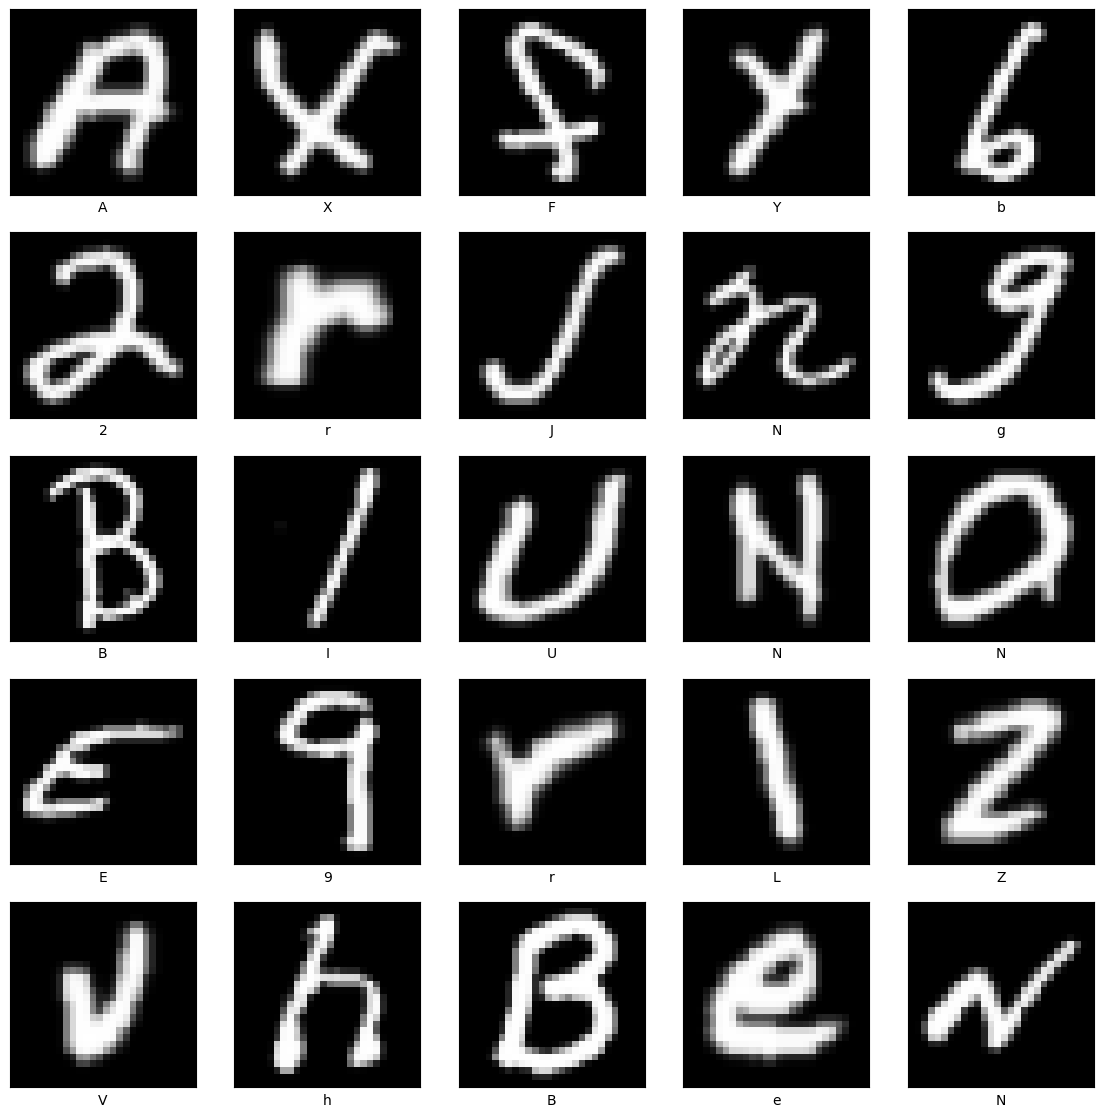

In [7]:
start = random.randint(0, 112700)

alpha = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
         'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't', ] # see https://arxiv.org/pdf/1702.05373v2.pdf (page 5)


plt.figure(figsize=(14,14))
for i in range(start, (start+25) ):
    j = i - start
    plt.subplot(5,5, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)       
    # Needs to be inverted and rotated
    rotated_img = ndimage.rotate(train_images[i], 90)
    plt.imshow(rotated_img, cmap=plt.cm.gray, origin='lower') 
    plt.xlabel(alpha[train_labels[i]])
plt.show()

## Models

The model I am going to use will be very similar to the [classification tutorial](https://www.tensorflow.org/tutorials/keras/classification) since the dataset I am using is not too dissimilar to Fashion MNIST. Using layers like the 'Conv2D'-layer & 'MaxPooling2D'-layer would help the model but since the exercise calls for an ANN so I don’t think adding them would be appropriate.

For investigating hyperparameter I will look at learning rate and batch size.

In the plots at the bottom (loss & accuracy for training) we can see that model_0 and model_1 perform better than model_2 and model_3. This should be because of the [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) used. [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) has a learning rate of 0.001 while [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD) has one of 0.01. Model_3 comes closer to the accuracy of model_0 and model_1 because it gets larger batches which could compensate for the difference in learning rate or optimizer in general.

We can see that the larger batch size doesn’t really matter for model_1 in comparison to model_0. Overfitting is also not a problem yet (in any of the models) since the accuracy on the test set lies close to the accuracy on the last epoch of the training set.  


In [57]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(47)
])

In [58]:
model_0.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
history_0 = model_0.fit(train_images, train_labels, epochs=10, batch_size=400)

Epoch 1/10
282/282 [==============================] - 4s 10ms/step - loss: 1.3360 - accuracy: 0.6330
Epoch 2/10
282/282 [==============================] - 3s 11ms/step - loss: 0.7518 - accuracy: 0.7720
Epoch 3/10
282/282 [==============================] - 3s 11ms/step - loss: 0.6073 - accuracy: 0.8077
Epoch 4/10
282/282 [==============================] - 3s 10ms/step - loss: 0.5331 - accuracy: 0.8275
Epoch 5/10
282/282 [==============================] - 3s 11ms/step - loss: 0.4812 - accuracy: 0.8416
Epoch 6/10
282/282 [==============================] - 3s 10ms/step - loss: 0.4484 - accuracy: 0.8495
Epoch 7/10
282/282 [==============================] - 3s 11ms/step - loss: 0.4185 - accuracy: 0.8582
Epoch 8/10
282/282 [==============================] - 3s 11ms/step - loss: 0.3972 - accuracy: 0.8629
Epoch 9/10
282/282 [==============================] - 3s 11ms/step - loss: 0.3769 - accuracy: 0.8702
Epoch 10/10
282/282 [==============================] - 3s 11ms/step - loss: 0.3606 - accura

In [60]:
test_loss_0, test_acc_0 = model_0.evaluate(test_images, test_labels, batch_size=10, verbose=1)

1880/1880 [==============================] - 12s 6ms/step - loss: 0.4986 - accuracy: 0.8417


***

In [51]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(47)
])

In [52]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
history_1 = model_1.fit(train_images, train_labels, epochs=10, batch_size=8)

Epoch 1/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.8316 - accuracy: 0.7391
Epoch 2/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.5600 - accuracy: 0.8119
Epoch 3/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.5038 - accuracy: 0.8280
Epoch 4/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.4712 - accuracy: 0.8379
Epoch 5/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.4522 - accuracy: 0.8441
Epoch 6/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.4354 - accuracy: 0.8479
Epoch 7/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.4242 - accuracy: 0.8540
Epoch 8/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.4150 - accuracy: 0.8564
Epoch 9/10
14100/14100 [==============================] - 139s 10ms/step - loss: 0.4050 - accuracy: 0.8591
Epoch 10/10
14100/14100 [============

In [54]:
test_loss_1, test_acc_1 = model_1.evaluate(test_images, test_labels, batch_size=10, verbose=1)

1880/1880 [==============================] - 12s 6ms/step - loss: 0.7470 - accuracy: 0.8186


***

In [45]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(47)
])

In [46]:
model_2.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
history_2 = model_2.fit(train_images, train_labels, epochs=10, batch_size=400)

Epoch 1/10
282/282 [==============================] - 3s 10ms/step - loss: 3.6420 - accuracy: 0.1108
Epoch 2/10
282/282 [==============================] - 3s 10ms/step - loss: 3.0003 - accuracy: 0.3300
Epoch 3/10
282/282 [==============================] - 3s 10ms/step - loss: 2.2797 - accuracy: 0.4713
Epoch 4/10
282/282 [==============================] - 3s 10ms/step - loss: 1.8339 - accuracy: 0.5405
Epoch 5/10
282/282 [==============================] - 3s 10ms/step - loss: 1.6088 - accuracy: 0.5775
Epoch 6/10
282/282 [==============================] - 3s 10ms/step - loss: 1.4841 - accuracy: 0.6007
Epoch 7/10
282/282 [==============================] - 3s 10ms/step - loss: 1.4046 - accuracy: 0.6155
Epoch 8/10
282/282 [==============================] - 3s 10ms/step - loss: 1.3477 - accuracy: 0.6281
Epoch 9/10
282/282 [==============================] - 3s 10ms/step - loss: 1.3033 - accuracy: 0.6400
Epoch 10/10
282/282 [==============================] - 3s 10ms/step - loss: 1.2670 - accura

In [73]:
test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels, batch_size=10, verbose=1)

1880/1880 [==============================] - 12s 6ms/step - loss: 1.2722 - accuracy: 0.6470


***

In [48]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(47)
])

In [49]:
model_3.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
history_3 = model_3.fit(train_images, train_labels, epochs=10, batch_size=40)

Epoch 1/10
2820/2820 [==============================] - 26s 9ms/step - loss: 1.9822 - accuracy: 0.4924
Epoch 2/10
2820/2820 [==============================] - 25s 9ms/step - loss: 1.1634 - accuracy: 0.6727
Epoch 3/10
2820/2820 [==============================] - 26s 9ms/step - loss: 0.9804 - accuracy: 0.7182
Epoch 4/10
2820/2820 [==============================] - 26s 9ms/step - loss: 0.8620 - accuracy: 0.7480
Epoch 5/10
2820/2820 [==============================] - 26s 9ms/step - loss: 0.7784 - accuracy: 0.7690
Epoch 6/10
2820/2820 [==============================] - 27s 9ms/step - loss: 0.7161 - accuracy: 0.7855
Epoch 7/10
2820/2820 [==============================] - 26s 9ms/step - loss: 0.6674 - accuracy: 0.7976
Epoch 8/10
2820/2820 [==============================] - 27s 9ms/step - loss: 0.6278 - accuracy: 0.8073
Epoch 9/10
2820/2820 [==============================] - 27s 9ms/step - loss: 0.5958 - accuracy: 0.8146
Epoch 10/10
2820/2820 [==============================] - 26s 9ms/step - l

In [55]:
test_loss_3, test_acc_3 = model_3.evaluate(test_images, test_labels, batch_size=10, verbose=1)

1880/1880 [==============================] - 12s 6ms/step - loss: 0.6198 - accuracy: 0.8081


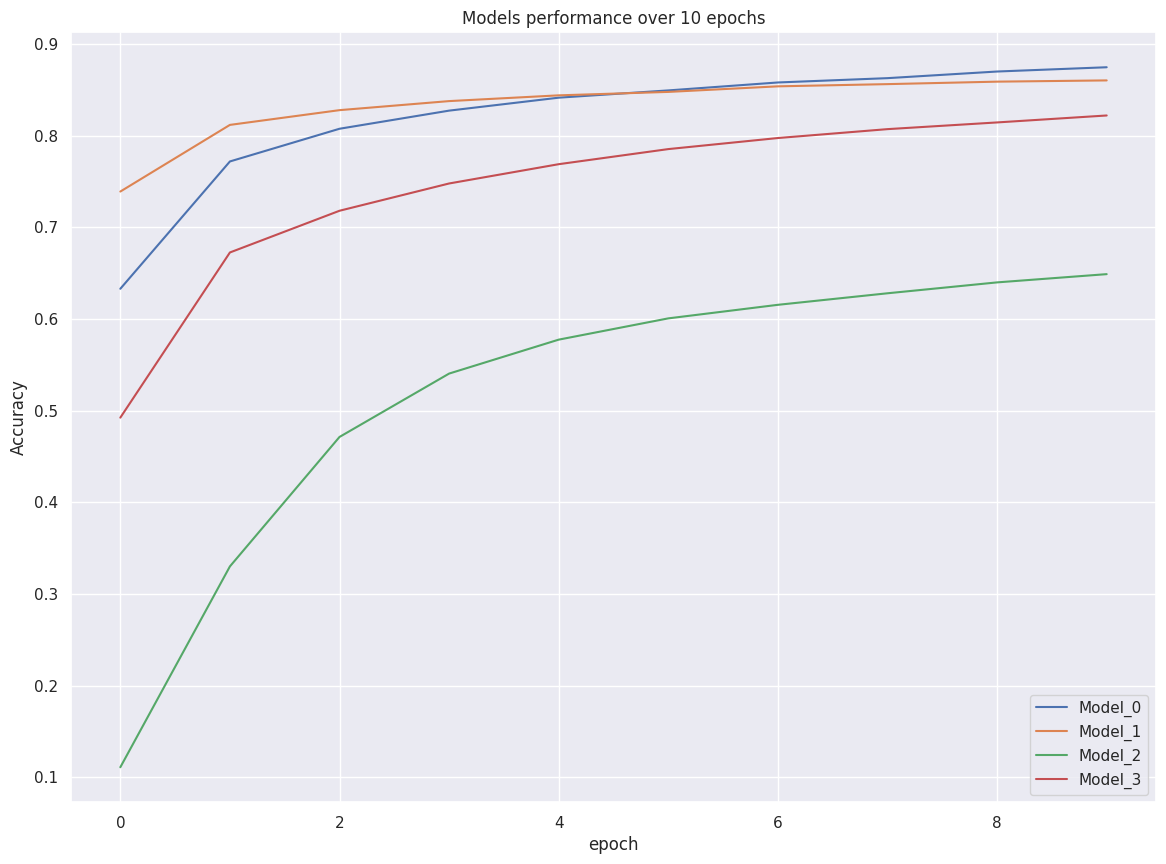

In [69]:
plt.plot(history_0.history['accuracy'])
plt.plot(history_1.history['accuracy'])
plt.plot(history_2.history['accuracy'])
plt.plot(history_3.history['accuracy'])
plt.title('Models performance over 10 epochs')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Model_0','Model_1','Model_2','Model_3'], loc='lower right')
plt.show()

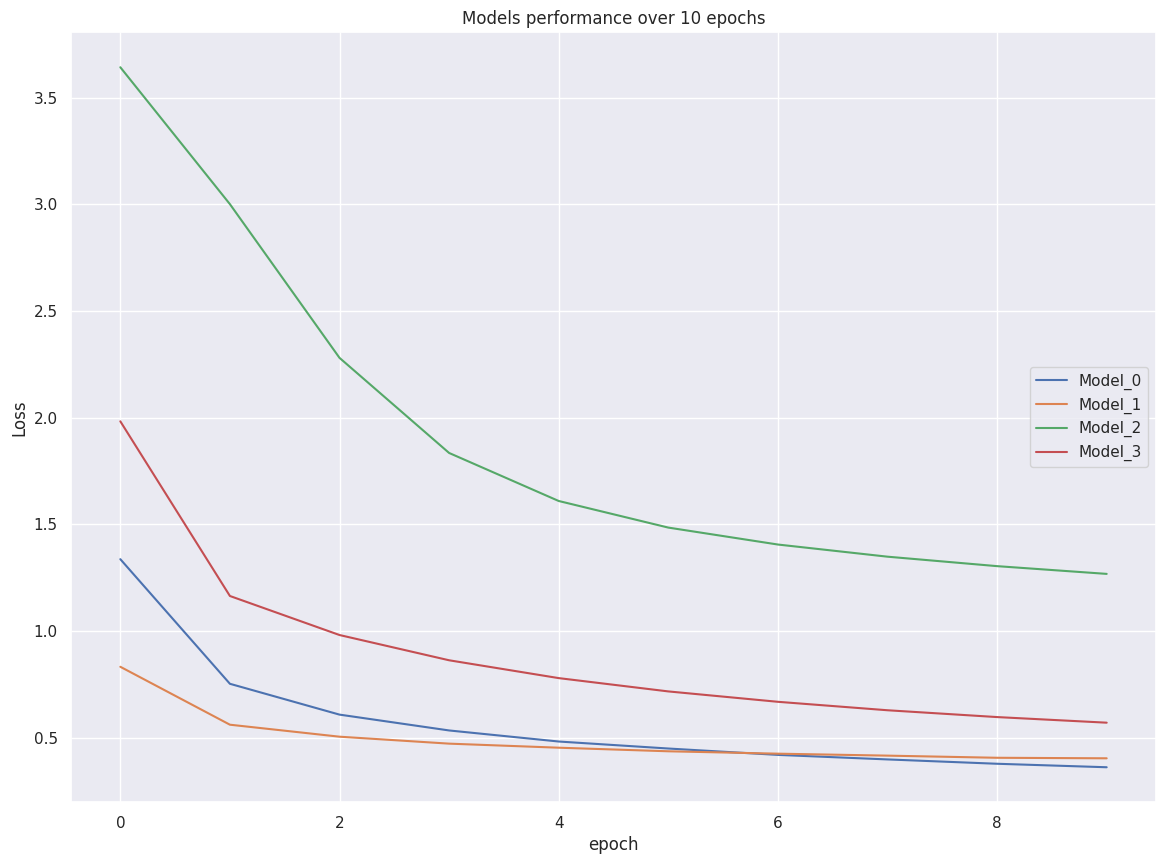

In [72]:
plt.plot(history_0.history['loss'])
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.title('Models performance over 10 epochs')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Model_0','Model_1','Model_2','Model_3'], loc='right')
plt.show()

## Evaluation

I will only make a confusion matrix for Model_0, the other models are very similar and will (most likely) have very similar confusion matrices.<br>

Found the TensorFlow confusion matrix fairly unreadable so I looked to create a better one using seaborn. <br>

Looking at that visualization we can see that there are some understandable outliers like predicting an 'O' instead of a '0' (zero), '9' instead of 'q' or 'g', '1' instead of 'l' or 'i', and vice versa. What is interesting is that the inverse isn’t necessarily as pronounced, the model more often mistakes an 'O' for a zero then it mistakes a zero for an 'O. This might have to do with the quality of the dataset (i.e. the wrongly categorized 'O'-'s could be drawn very elongated like an actual zero instead of more round).


In [18]:
predictions_0 = model_0.predict(test_images, batch_size=1)
pred_0 = np.argmax(predictions_0, axis=-1)

18800/18800 [==============================] - 52s 3ms/step


In [19]:
metrics.confusion_matrix(test_labels, pred_0)

array([[283,   0,   0, ...,   0,   0,   0],
       [  0, 294,   1, ...,   0,   0,   1],
       [  0,   0, 347, ...,   2,   0,   0],
       ...,
       [  1,   0,   1, ..., 227,   0,   3],
       [  0,   0,   0, ...,   0, 376,   0],
       [  0,   1,   1, ...,   0,   8, 347]])

[Text(0.5, 1.0, 'Plot model_0')]

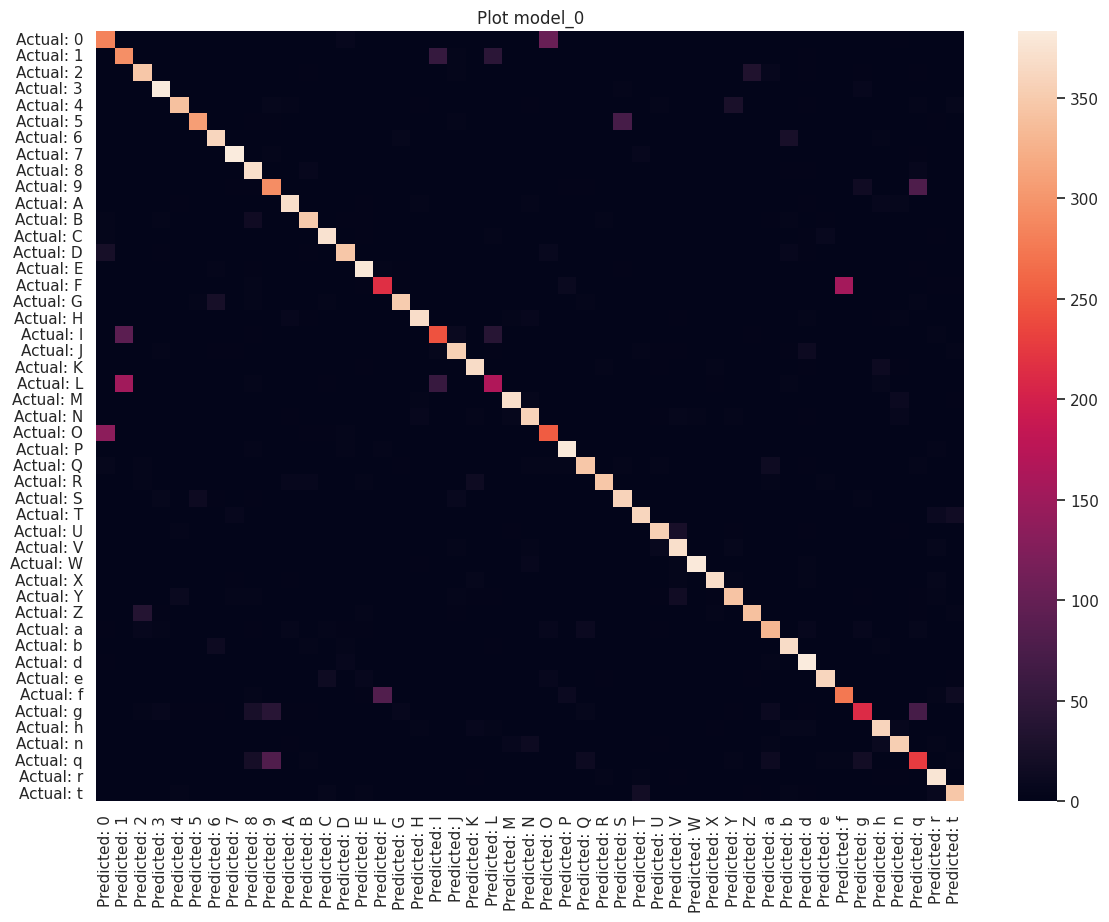

In [30]:
def plot(model_name, predictions, actual=test_labels):    
    labels = list(set(train_labels))
    column = [f'Predicted: {alpha[label]}' for label in labels]
    indices = [f'Actual: {alpha[label]}' for label in labels]
    table = pd.DataFrame(metrics.confusion_matrix(actual, predictions),
                         columns=column, index=indices)    
    sns.set(rc = {'figure.figsize':(14,10)})
    return sns.heatmap(table, fmt='d', cmap='rocket', linewidths=.001, annot=False).set(title=f'Plot {model_name}') #linewidths?

plot('model_0', pred_0)

***
# Progression of project

## Approach

When looking for data sets I stumbled on the [Tensorflow dataet catalogue](https://www.tensorflow.org/datasets/catalog/overview).  Initially I wanted to use the EMNIST/letters dataset but since the issue with 37 classes instead of 26 was not resolved I used EMNIST/balanced in the end. 
First off, I plotted a small collection of the dataset (just as is done in the Fashion MNIST [tutorial](https://www.tensorflow.org/tutorials/keras/classification)) to check out the data. I found some of the entries a bit hard to read myself so I assumed the ANN might struggle a bit. Had to do a bit of research on matplotlib.imshow() to make it readable but this was done quickly <br>

Secondly, I created the model and, again, mostly followed the example set in the [tutorial](https://www.tensorflow.org/tutorials/keras/classification). For the hyperparameters I chose to change up the batch size & optimizer. Reason for this was that the change in optimizer lead to a difference in learning rate and I wanted to see how this impacted the model. Turns out that Adam’s learning rate of (0.001) works better than SGD’s (0.01). The difference in batch size remained largely irrelevant. Maybe overfitting would’ve become an issue earlier for larger batches if more epochs were used. Didn’t change the number of epochs (changes in 2 parameters were asked) but this could’ve obviously also been changed for a model to see a change in performance. Although, considering the size of the dataset I don’t think overfitting would become an issue any time soon. <br>

Lastly, for the evaluation I found that the models perform rather well. Some issues were expected (for example differentiating between ‘0’ and ‘O’) but my earlier worries of bad entries in the dataset messing with the model turned out to be largely unfounded. As for the creation of the plot itself, I found simply using the TensorFlow command a bit lacking (can’t really read a 2d array of 47x47) so I decided to re-use a plot I made last year with sns.heatmap().


## Issues

- The EMNIST/letters dataset should have 26 classes but has 37. The issue is [discussed](https://github.com/tensorflow/datasets/issues/2579) but not fixed. You could still use the dataset but you would have to put 37 output nodes in the model, eventhough 11 are unused. (I dont understand why it doesnt work for 26 since the other 11 are not at all used)

- The EMNIST/bymerge & EMNIST/byclass are very unbalanced [see page 5](https://arxiv.org/pdf/1702.05373v2.pdf) which results in a model that struggles (more) in recognizing classes that are less available in the dataset (also makes the heatmap more unbalanced since the 'O', 'e' & 'S' have so many more entries and thus True Positives). 

- Looking at the data exploration we can see that some entries are not good.  

- Setting up Tensorflow to work with the GPU was a real pain. In the end this guide worked for me [YT guide](https://www.youtube.com/watch?v=YozfiLI1ogY). The issue stems from changes in TensorFlow 2.11 making most guides I found obsolete.


## Reflection on aquired knowledge

This exercise was fairly similar to activities from last semester. But I've learned a bit more about hyperparameters while researching the different ones I could use. I've also stumbled on [tensorflow datasets catalog](https://www.tensorflow.org/datasets/catalog/overview) which will be helpfull in the coming exercises. Making TensorFlow use my GPU was also quite the chore so having done that will be usefull in the future.

***

# Appendix


## Sources


[SNS docs heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[Heatmap](https://www.youtube.com/watch?v=URbyDKfQT0Y)

[Mirrored images matplot](https://matplotlib.org/stable/tutorials/intermediate/imshow_extent.html)

[Rotate images matplot](https://stackoverflow.com/questions/31401812/matplotlib-rotate-image-file-by-x-degrees)

[EMNIST dataset](https://www.tensorflow.org/datasets/catalog/emnist)

[EMNIST research paper](https://arxiv.org/pdf/1702.05373v2.pdf)

[TensorFlow documentation, MNIST classification](https://www.tensorflow.org/tutorials/keras/classification)

[Tensorflow docs; loading Fasion_MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)

[Numpy reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

